In [1]:
import pandas as pd
from sklearn.datasets import load_diabetes

dataset= load_diabetes()
dataset['DESCR']

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n:Number of Instances: 442\n\n:Number of Attributes: First 10 columns are numeric predictive values\n\n:Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n:Attribute Information:\n    - age     age in years\n    - sex\n    - bmi     body mass index\n    - bp      average blood pressure\n    - s1      tc, total serum cholesterol\n    - s2      ldl, low-density lipoproteins\n    - s3      hdl, high-density lipoproteins\n    - s4      tch, total cholesterol / HDL\n    - s5      ltg, possibly log of serum triglycerides level\n    - s6      glu, blood sugar level\n\nNote: Each of thes

In [2]:
print(dataset)

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]]), 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
  

In [11]:
df = pd.DataFrame(data=dataset.data, columns=['age','sex','bmi','bp','s1','s2','s3','s4','s4','s6'])
X= df
y=dataset['target']
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s4,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

### Decision Tree Regressor

In [7]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()

In [8]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [9]:
y_pred = regressor.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
score = accuracy_score(y_pred, y_test)

print(score)

0.0


## Hyper parameter tunning for finding best possible params

In [13]:
## all possible configutaion from the documents
params = {
  'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
  'splitter':['best', 'random'],
  'max_depth':[1,2,3,4,5,10,15,20,25],
  'max_features': ['sqrt','log2']
}

In [14]:
from sklearn.model_selection import GridSearchCV

In [23]:
reg = DecisionTreeRegressor()
grid = GridSearchCV(reg,param_grid=params,cv=5,scoring='neg_mean_squared_error')

In [24]:
import warnings
warnings.filterwarnings('ignore')

In [25]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
                         'max_features': ['sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [26]:
grid.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 4,
 'max_features': 'log2',
 'splitter': 'best'}

In [27]:
y_pred=grid.predict(X_test)

In [30]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2score= r2_score(y_test, y_pred)
meanAbsoluteError= mean_absolute_error(y_test, y_pred)
meanSquaredError= mean_squared_error(y_test, y_pred)

print('R2 Score', r2score)
print('meanAbsoluteError', meanAbsoluteError)
print('meanSquaredError', meanSquaredError)

R2 Score 0.37800357844910193
meanAbsoluteError 44.9830331769806
meanSquaredError 3357.728110323479


# Use this best params in Decision tree

In [33]:
selectModel = DecisionTreeRegressor(criterion= 'friedman_mse',max_depth= 4, max_features= 'log2', splitter= 'best')

In [34]:
selectModel.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=4,
                      max_features='log2')

[Text(0.4732142857142857, 0.9, 'x[8] <= 0.022\nfriedman_mse = 6148.282\nsamples = 309\nvalue = 153.903'),
 Text(0.23214285714285715, 0.7, 'x[2] <= 0.005\nfriedman_mse = 4633.616\nsamples = 206\nvalue = 126.388'),
 Text(0.3526785714285714, 0.8, 'True  '),
 Text(0.14285714285714285, 0.5, 'x[6] <= 0.021\nfriedman_mse = 2824.048\nsamples = 149\nvalue = 105.477'),
 Text(0.07142857142857142, 0.3, 'x[9] <= -0.032\nfriedman_mse = 3258.671\nsamples = 92\nvalue = 116.261'),
 Text(0.03571428571428571, 0.1, 'friedman_mse = 1809.145\nsamples = 31\nvalue = 91.129'),
 Text(0.10714285714285714, 0.1, 'friedman_mse = 3511.212\nsamples = 61\nvalue = 129.033'),
 Text(0.21428571428571427, 0.3, 'x[8] <= 0.015\nfriedman_mse = 1631.855\nsamples = 57\nvalue = 88.07'),
 Text(0.17857142857142858, 0.1, 'friedman_mse = 1392.867\nsamples = 55\nvalue = 85.527'),
 Text(0.25, 0.1, 'friedman_mse = 3136.0\nsamples = 2\nvalue = 158.0'),
 Text(0.32142857142857145, 0.5, 'x[6] <= -0.084\nfriedman_mse = 5232.576\nsamples = 5

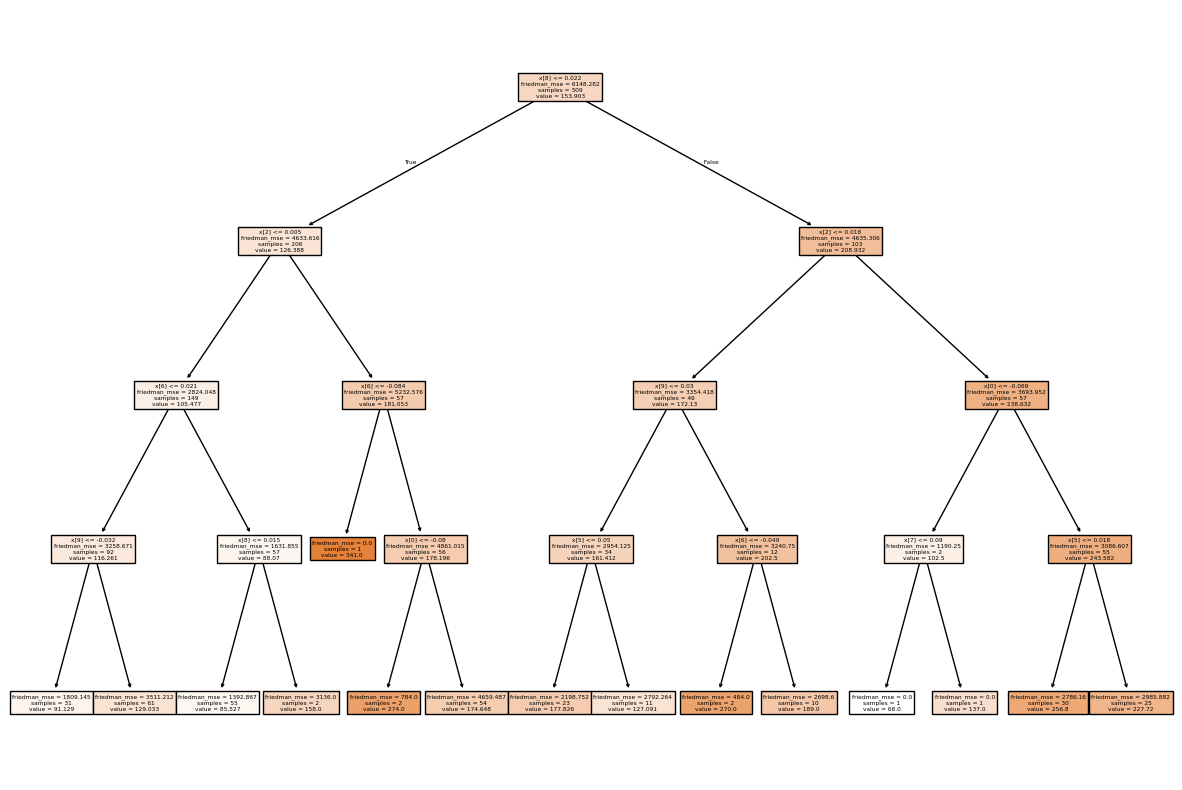

In [36]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(15,10))
tree.plot_tree(selectModel, filled=True)